In [1]:
### Healthcare Premium Prediction

In [2]:
# import the libraries 

import pandas as pd # data 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV , train_test_split

In [3]:
# Import the datasets 

df = pd.read_excel("premiums_young.xlsx")
df.head(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [4]:
#Check the shape of datasets 

df.shape

(20096, 13)

In [5]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [6]:
#Inconsistence columns name changing lowercase and "_" on datasets 

df.columns = df.columns.str.replace(" ", "_").str.lower()

In [7]:
df

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603
20092,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,Gold,14498
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564


### Handle NA Values

In [8]:
#Check null values in each column 

df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

## Check duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

### Check quick stats of the datasets

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267
std,2.294052,0.940713,23.420493,2749.906347
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


## Check number_of_dependants columns to view the rows having negative values 

In [12]:
df[df["number_of_dependants"] < 0]["number_of_dependants"].unique()

array([-3, -1])

In [13]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

### Check Outliers in datasets

In [14]:
numeric_columns = df.select_dtypes(['float64', 'int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

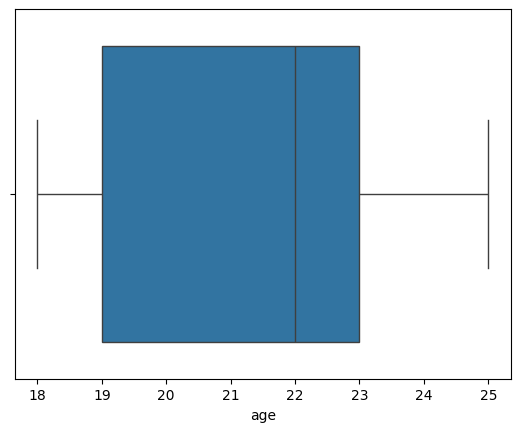

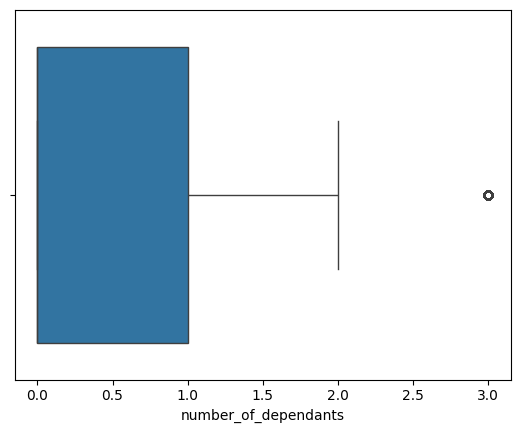

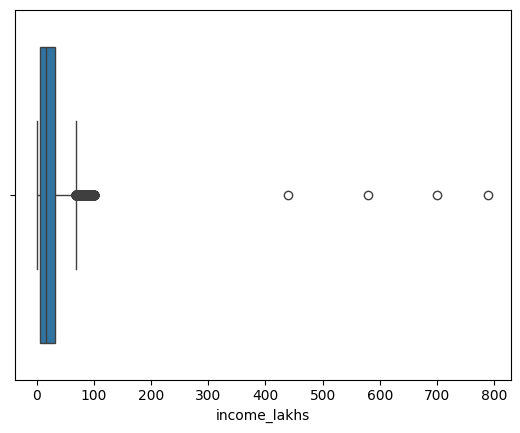

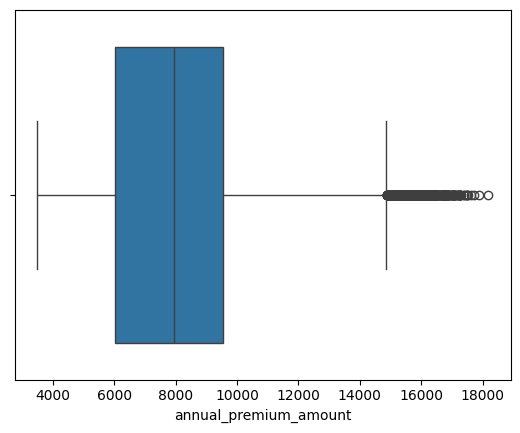

In [15]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [16]:
## Include age <=100    in the dataset 

df1 = df[df['age']<=100].copy()

In [17]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267
std,2.294052,0.937200,23.420493,2749.906347
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [18]:
### Use IQR to remove outliers for income 
## Create functions 

def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1 
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound,upper_bound

In [19]:
quantile_threshold = get_iqr_bounds(df1['income_lakhs'])
quantile_threshold

(-31.5, 68.5)

## The upperbound is relatively lesser than hence we might use 0.999 quantile than IQR method

In [20]:
quantile_threshold2 = df1['income_lakhs'].quantile(0.999)
quantile_threshold2

np.float64(100.0)

In [21]:
df2 = df1[df1['income_lakhs']<=quantile_threshold2].copy()

In [22]:
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603
20092,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,Gold,14498
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564


In [23]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263
std,2.294248,0.937238,21.732062,2749.912486
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.000000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,100.000000,18186.000000


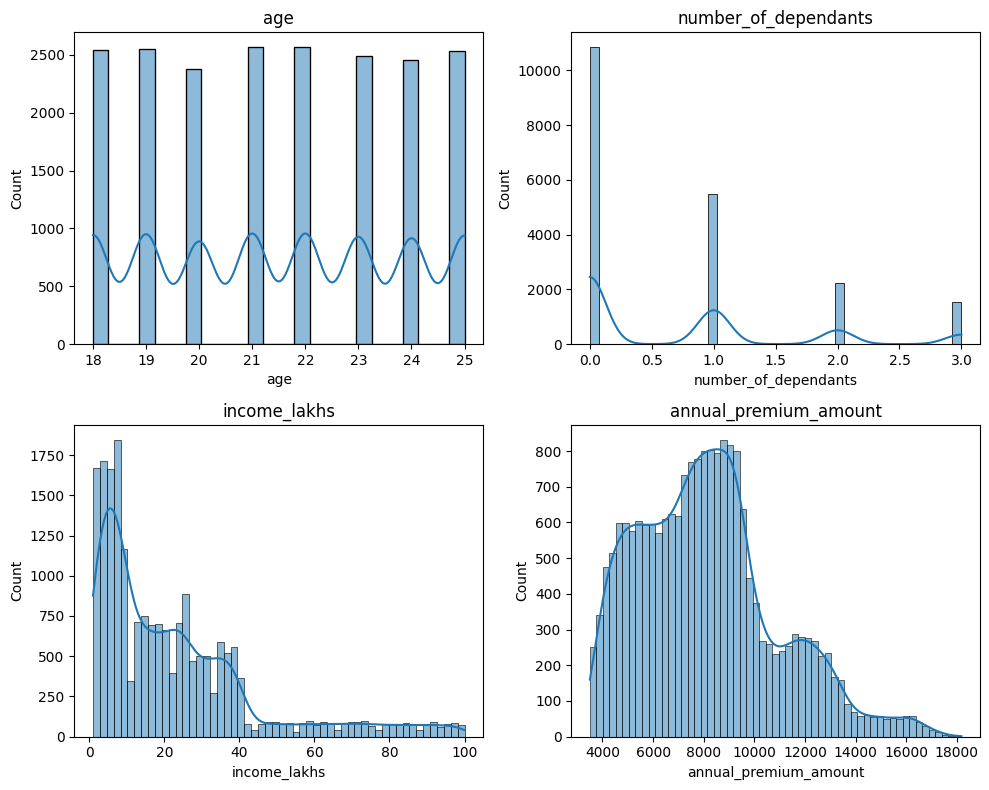

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8)) 

for i, column in enumerate(numeric_columns):
    ax = axs[i // 2, i% 2] 
    sns.histplot(df2[column],kde=True,ax=ax)
    ax.set_title(column)
plt.tight_layout()
plt.show()

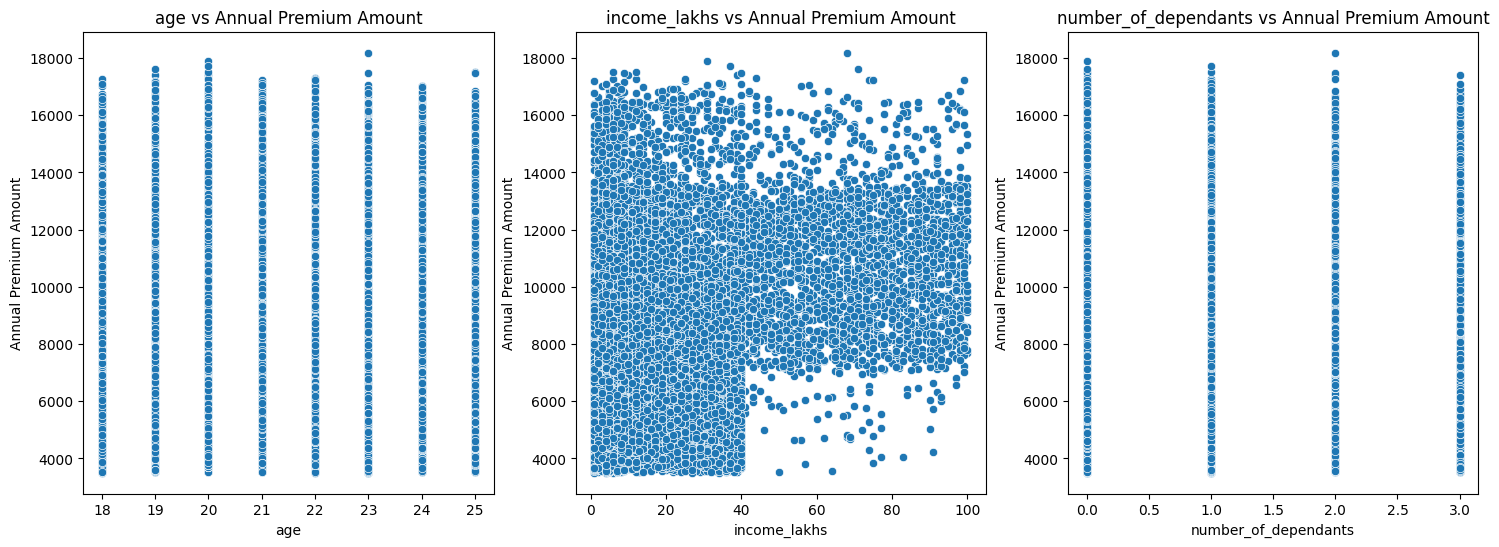

In [25]:
# Draw scatter plot 

numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig , axes = plt.subplots(1,len(numeric_features), figsize=(18, 6)) 

for ax , column in zip(axes,numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'],ax=ax)
    ax.set_title(f'{column} vs Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout 
plt.show()

### Analyse categorical variables

In [26]:
categorical_columns = df2.select_dtypes(['object']).columns
categorical_columns


Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [27]:
for col in categorical_columns:
    print(col, ":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [28]:
df2['smoking_status'].replace({
    'Smoking=0' : 'No Smoking', 
    'Does Not Smoke' : 'No Smoking', 
    'Not Smoking' : 'No Smoking'      
},inplace=True)

C:\Users\prati\AppData\Local\Temp\ipykernel_2056\2031420591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


In [29]:
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [30]:
pct_count_gender = df2['gender'].value_counts(normalize=True)
pct_count_gender

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

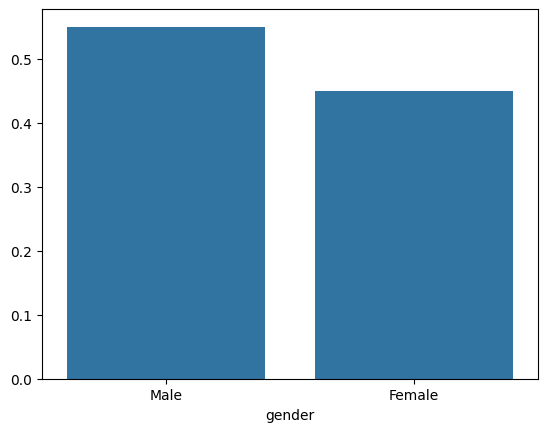

In [31]:
sns.barplot(x=pct_count_gender.index, y=pct_count_gender.values)

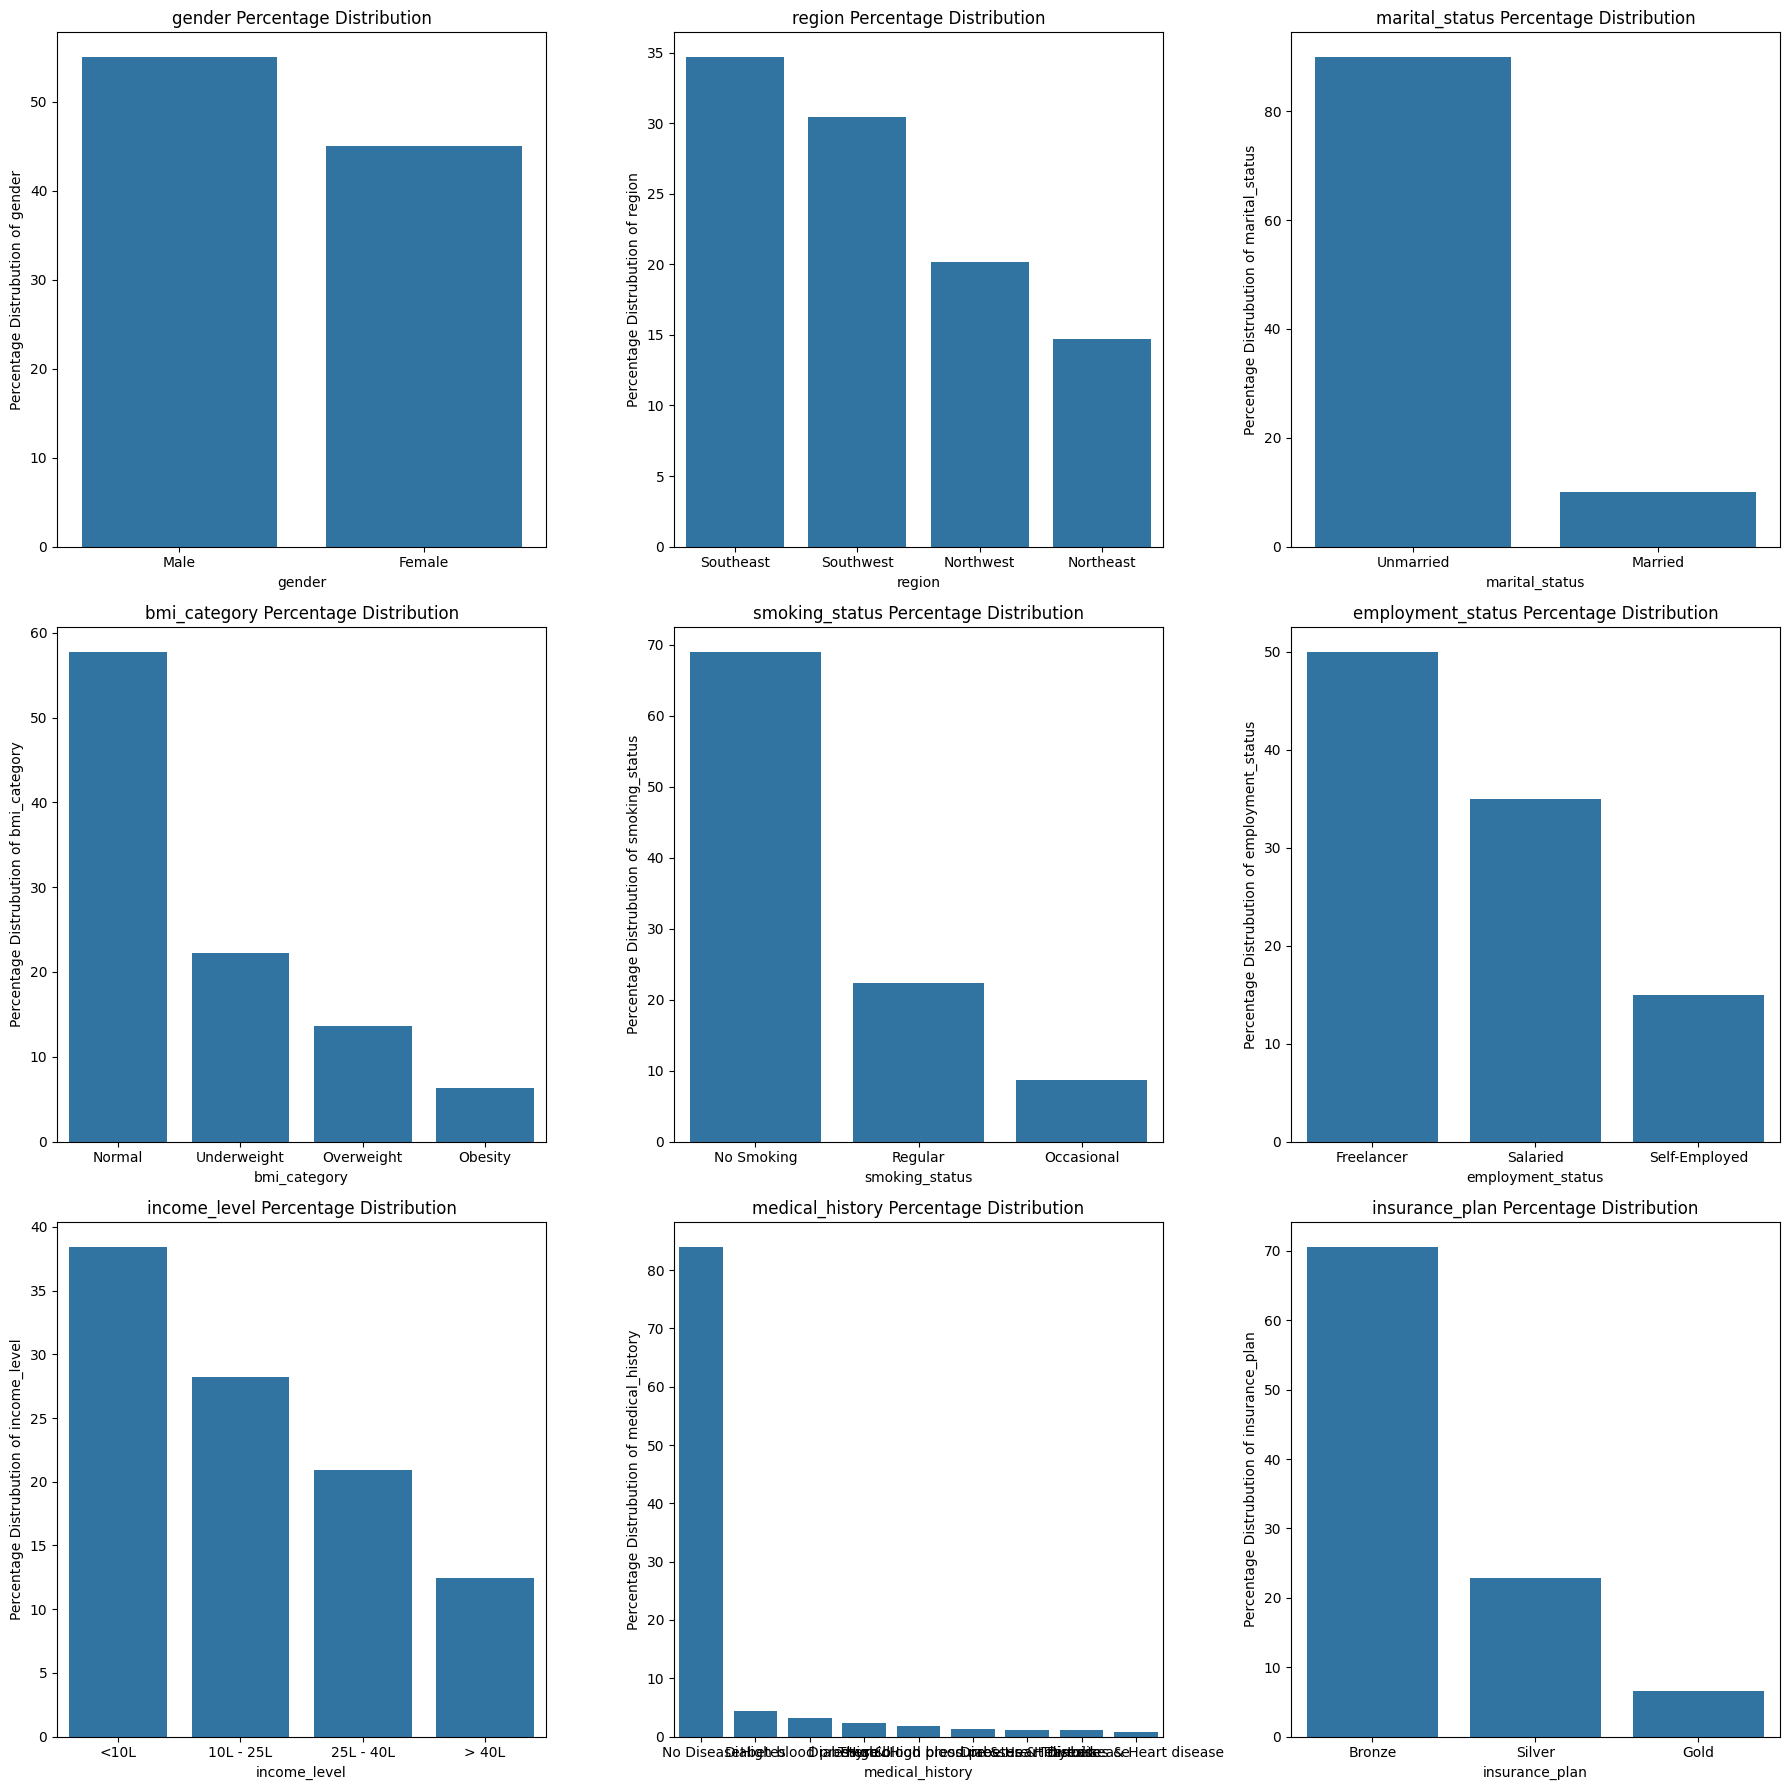

In [32]:
fig, axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten() 

for ax, column in zip(axes,categorical_columns):
    #Calculate the percentage distribution of each category 
     category_counts = df2[column].value_counts(normalize=True)*100
     sns.barplot(x=category_counts.index, y=category_counts.values, ax =ax)
     ax.set_title(f'{column} Percentage Distribution')
     ax.set_ylabel(f'Percentage Distrubution of {column}')
     ax.set_xlabel(column)
    

plt.tight_layout()
plt.show()
                
    

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


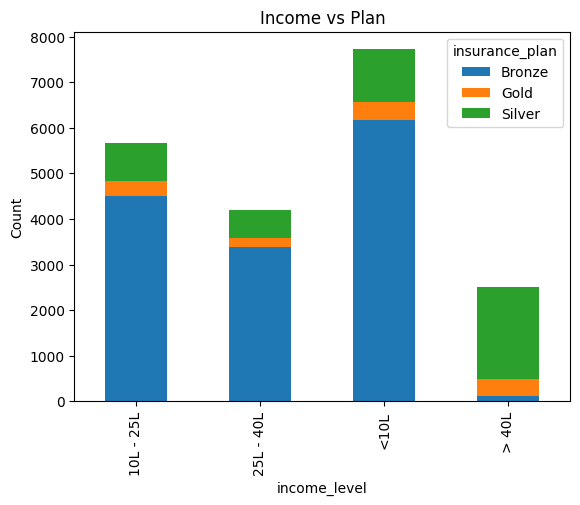

In [33]:
## Visualize multi-variable analysis using barplot 

crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='insurance_plan', ylabel='income_level'>

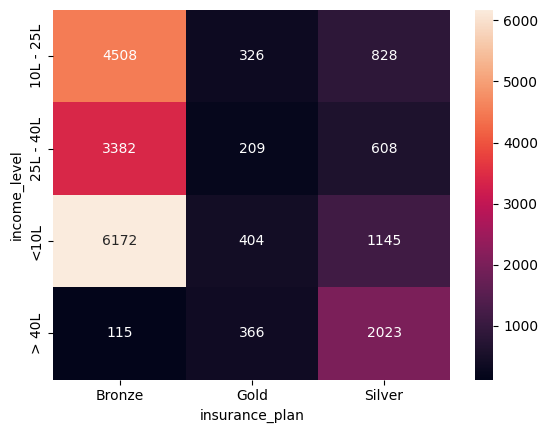

In [34]:
#Using heatmap to get more insights 

sns.heatmap(crosstab,annot=True,fmt="d")

### Feature Engineering 

In [35]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [36]:
risk_scores = {
       "diabetes" : 6, 
       "heart disease" : 8, 
       "high blood pressure" : 6, 
       "thyroid" : 5, 
       "no disease" : 0, 
       "none" : 0
}

In [37]:
df2[['disease1' , 'disease2']] = df2['medical_history'].str.split(" & " , expand = True).apply(lambda x: x.str.strip().str.lower())

In [38]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,None


In [39]:
## Replace na value to none 

df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace= True)

C:\Users\prati\AppData\Local\Temp\ipykernel_2056\1831598098.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\prati\AppData\Local\Temp\ipykernel_2056\1831598098.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [40]:
df2['total_risk_score'] = 0 

for disease in ['disease1' , 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score']-min_score)/(max_score - min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,none,0,0.000000


In [41]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [42]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver': 2, 'Gold': 3})

In [43]:
df2['income_level'].unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [44]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2 , '25L - 40L': 3, '> 40L': 4})
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,no disease,none,0,0.000000


In [45]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2,columns=nominal_cols, drop_first=True, dtype=int)

In [46]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,no disease,none,0,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,no disease,none,0,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,no disease,none,0,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,no disease,none,0,...,1,0,1,0,1,0,0,0,0,0


In [47]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,0.000000,0,0,1,0,1,0,0,0,0,1,1,0


# Conduct correlation analysis of datasets

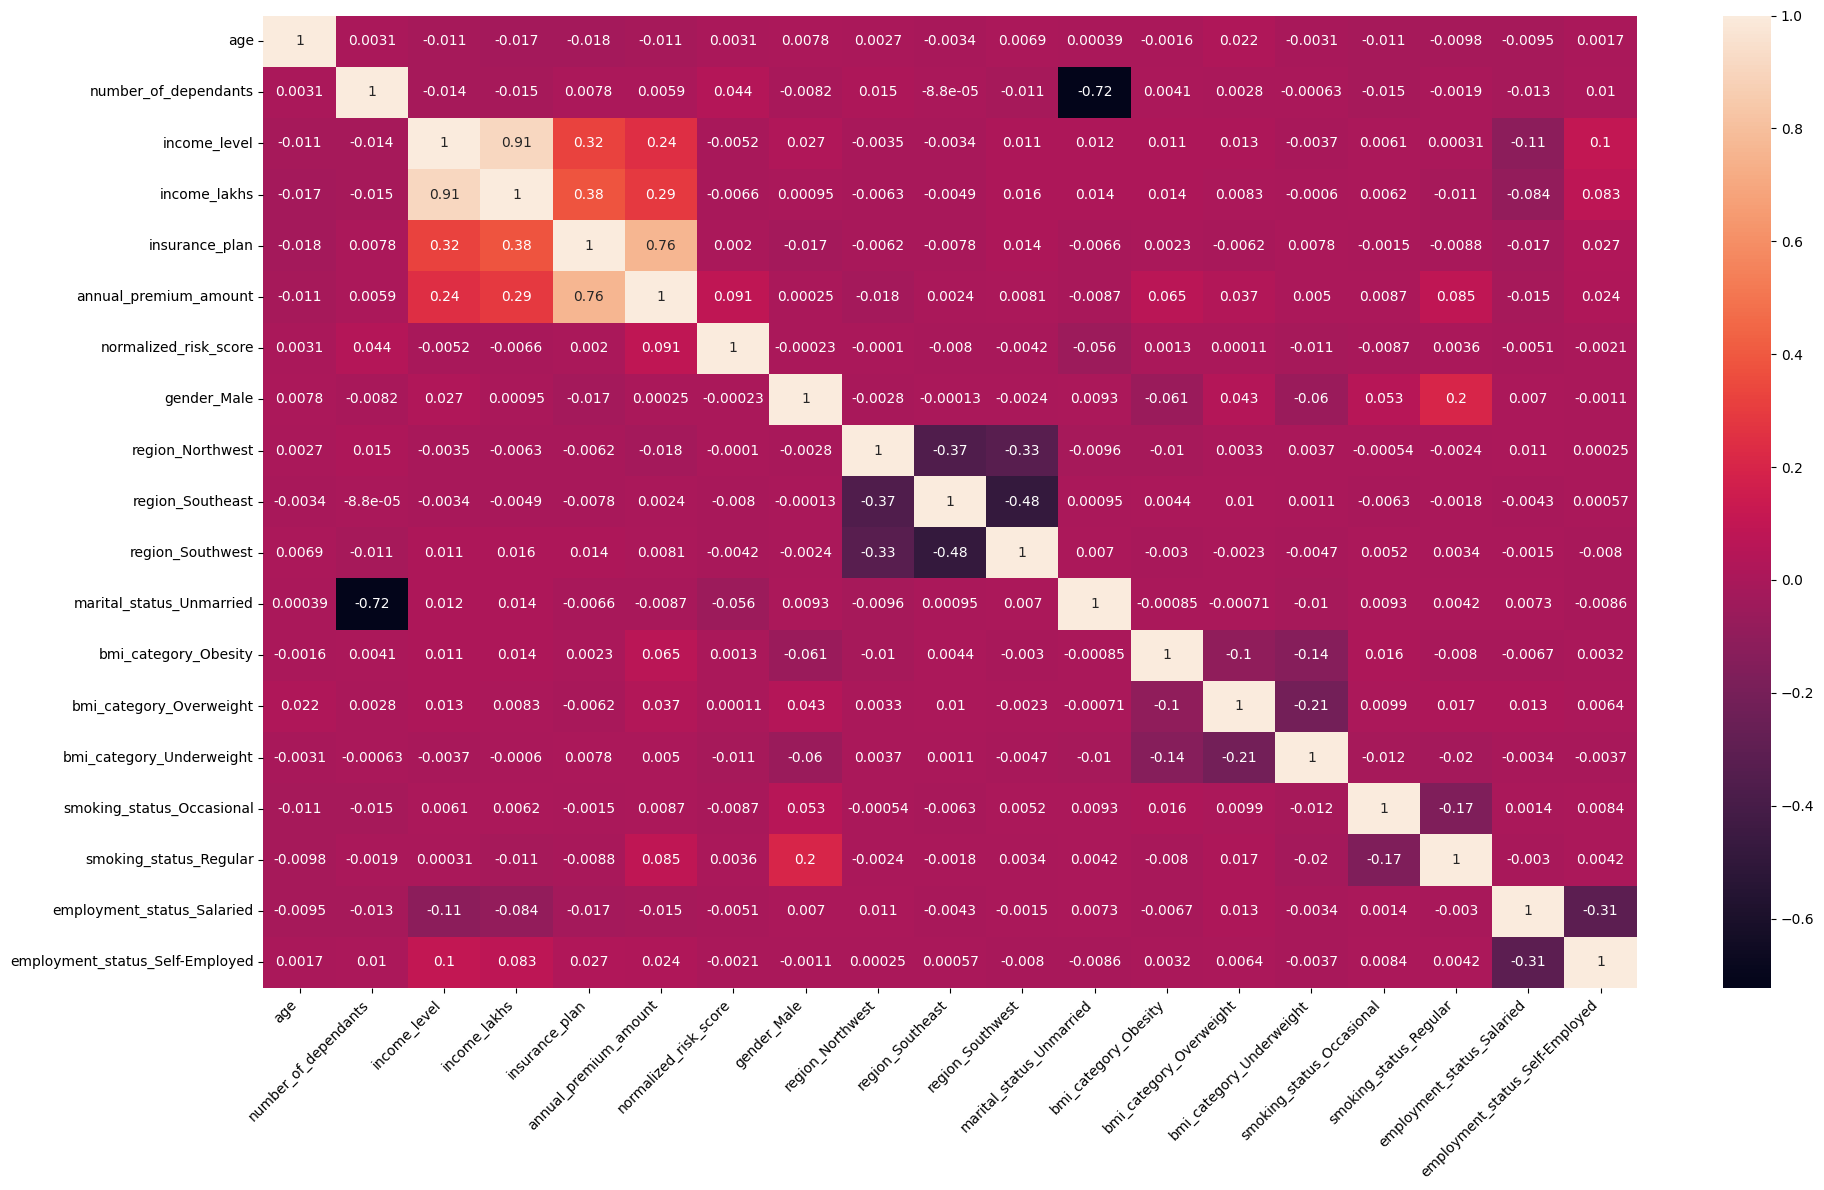

In [48]:
cm = df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [49]:
# Find the VIF score to select the related features 

X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

In [50]:
X.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'normalized_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [51]:
from sklearn.preprocessing import MinMaxScaler 

cols_to_scale = ['age' , 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan'] 

scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Calcuate VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns 
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [53]:
calculate_vif(X)

,Column,VIF
0,age,3.142881
1,number_of_dependants,1.860761
2,income_level,11.928707
3,income_lakhs,11.874242
4,insurance_plan,1.592892
5,normalized_risk_score,1.154223
6,gender_Male,2.310023
7,region_Northwest,2.147701
8,region_Southeast,2.970188
9,region_Southwest,2.730503


### Model Training

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print("x train:" , X_train.shape)
print("x test:", X_test.shape)
print("y train", y_train.shape)
print("y test:" , y_test.shape)

x train: (14060, 18)
x test: (6026, 18)
y train (14060,)
y test: (6026,)


In [55]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test,y_test)
train_score, test_score

(0.6021219606668605, 0.6047090664023846)

In [56]:
model_lr.intercept_

np.float64(6622.564527778572)

In [57]:
model_lr.coef_

array([ 5.55461878e+01, -1.45497215e+02, -1.63937192e+02,  2.01564588e+02,
        6.99537223e+03,  1.11187398e+03,  1.27860412e+01, -1.14709308e+02,
       -3.69181904e+01, -6.79136036e+01, -5.93761758e+01,  7.93045139e+02,
        4.36922190e+02,  1.69850233e+02,  2.44988509e+02,  6.19709799e+02,
       -1.60239263e+01, -6.49118305e-01])

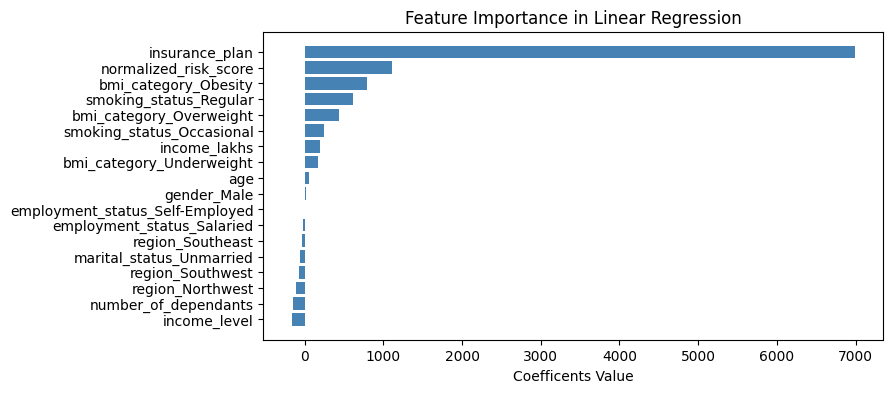

In [58]:
feature_importances = model_lr.coef_
coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficents']).sort_values(by= 'Coefficents', ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficents'],color='steelblue')
plt.xlabel('Coefficents Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [59]:
model_rg = Ridge()
model_rg.fit(X_train, y_train)
train_score_rg = model_rg.score(X_train, y_train)
test_score_rg = model_rg.score(X_test, y_test)
train_score_rg, test_score_rg

(0.6021215095308863, 0.6047219758473257)

In [60]:
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score =model_xgb.score(X_test, y_test)
train_score, test_score


(0.7201272249221802, 0.5685624480247498)

In [61]:
y_pred = model_xgb.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBRegressor==> MSE: " , mse_lr, "RMSE: " , rmse_lr)

XGBRegressor==> MSE:  3280931.25 RMSE:  1811.3341077780212


### Using Randomsearch CV for better model training

In [62]:
model_xgb = XGBRegressor()
param_grid = {
 'n_estimators' : [20, 40, 50], 
 'learning_rate' : [0.01, 0.1, 0.2], 
 'max_depth' : [3,4,5]
}

In [63]:
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=30)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.5996673305829366)

In [64]:
random_search.best_score_

np.float64(0.5996673305829366)

In [65]:
best_model = random_search.best_estimator_

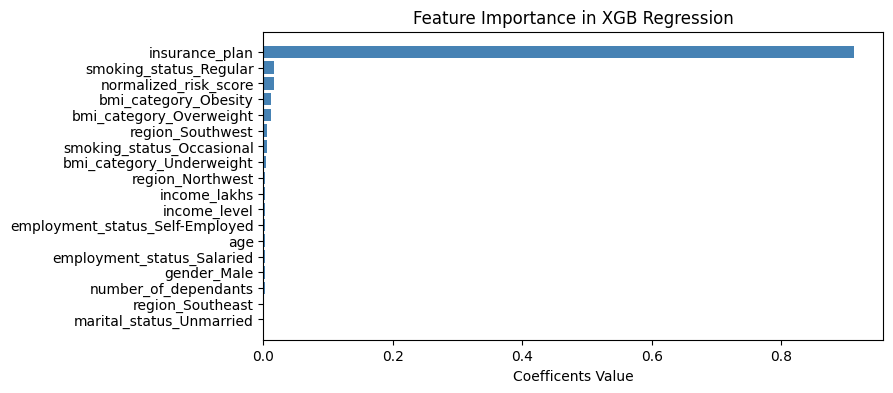

In [66]:
feature_importances_xgb = best_model.feature_importances_
coef_df = pd.DataFrame(feature_importances_xgb, index=X_test.columns, columns=['Coefficents']).sort_values(by= 'Coefficents', ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficents'],color='steelblue')
plt.xlabel('Coefficents Value')
plt.title('Feature Importance in XGB Regression')
plt.show()

### Error Analysis

In [67]:
y_pred =  best_model.predict(X_test)
residuals = y_pred - y_test 
residuals_pct = residuals*100/y_test 

results_df = pd.DataFrame(
    { 'actual' : y_test, 
       'predicated' : y_pred, 
       'diff' : residuals,
       'diff_pct': residuals_pct
    }
)
results_df.head()

,actual,predicated,diff,diff_pct
12774,6238,6669.329590,431.329590,6.914549
14758,9462,6999.429199,-2462.570801,-26.025902
13205,5152,6998.085449,1846.085449,35.832404
14278,6988,7868.310059,880.310059,12.597454
19351,4917,6677.658203,1760.658203,35.807570


<Axes: xlabel='diff_pct', ylabel='Count'>

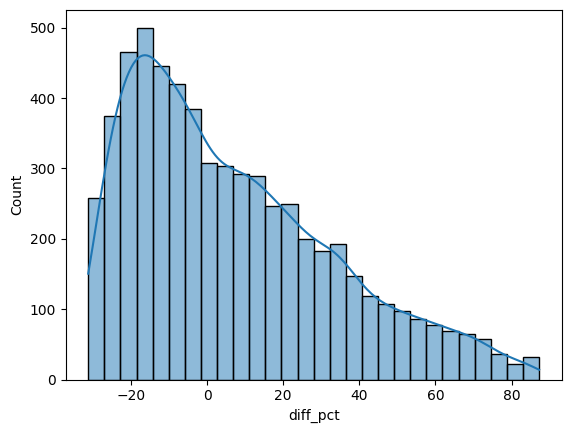

In [68]:
sns.histplot(results_df['diff_pct'], kde=True)

In [81]:
extreme_error_threshold = 10

extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df.shape

(4407, 4)

In [82]:
extreme_errors_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_errors_pct 

73.13308994357783

In [84]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct', ascending=False)

,actual,predicated,diff,diff_pct
4169,3517,6584.604004,3067.604004,87.222178
4692,3516,6572.262207,3056.262207,86.924409
12285,3532,6585.947754,3053.947754,86.465112
3652,3536,6585.947754,3049.947754,86.254179
16580,3538,6585.947754,3047.947754,86.148891
...,...,...,...,...
405,4659,6999.680176,2340.680176,50.239969
3032,4388,6585.947754,2197.947754,50.089967
44,4389,6584.604004,2195.604004,50.025154
15383,4390,6585.947754,2195.947754,50.021589


### Finding the extreme error index and processing it

In [85]:
extreme_results_df.index

Index([14758, 13205, 14278, 19351, 10622, 14799, 16348,  5573,  5634, 14882,
       ...
        5484,  8988,  8695,  9658,  1365,   399, 17652,  5807, 10298, 13316],
      dtype='int64', length=4407)

In [86]:
extreme_error_df = X_test.loc[extreme_results_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14758,0.285714,0.000000,0.000000,0.060606,0.0,0.000000,0,0,0,1,1,0,0,0,0,1,0,1
13205,0.714286,0.333333,0.333333,0.141414,0.0,0.000000,1,1,0,0,1,0,0,0,0,1,0,1
14278,0.714286,0.333333,0.333333,0.222222,0.0,0.000000,1,0,1,0,1,1,0,0,0,1,0,0
19351,0.571429,0.000000,0.333333,0.101010,0.0,0.000000,1,0,0,1,1,0,0,1,0,0,0,0
10622,0.428571,0.333333,0.000000,0.050505,0.0,0.357143,0,0,1,0,1,0,1,0,0,0,0,0


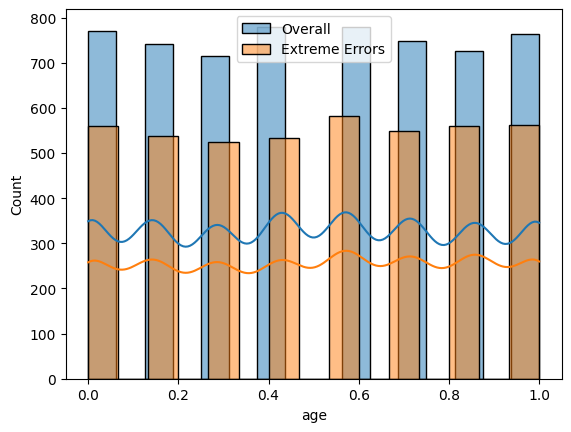

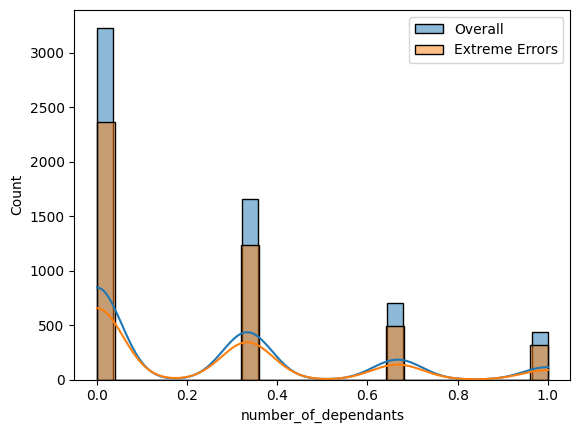

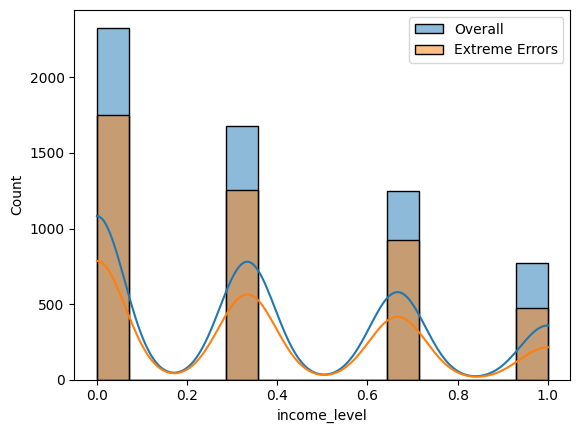

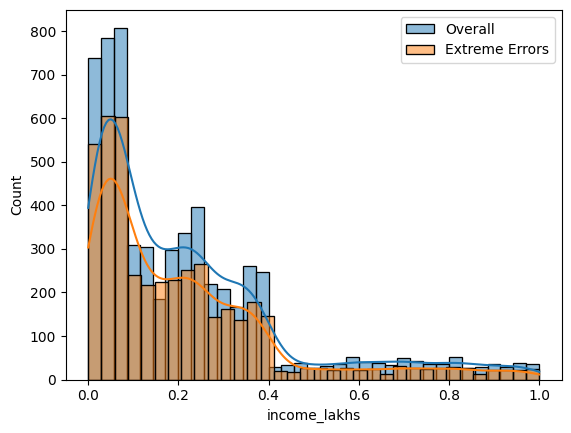

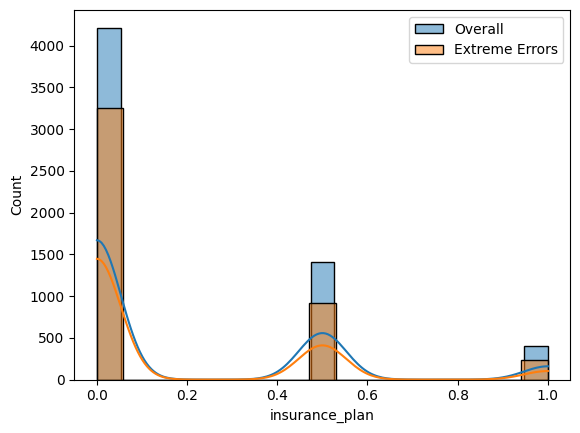

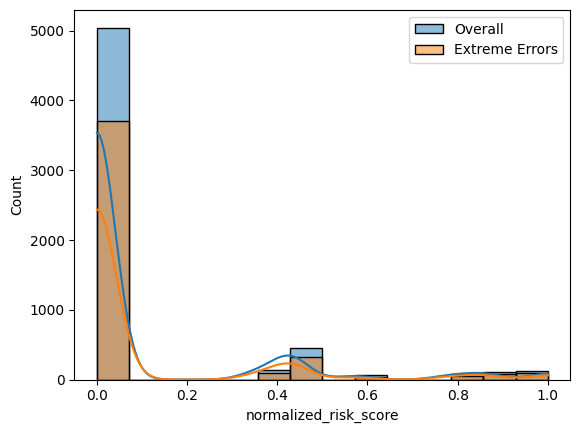

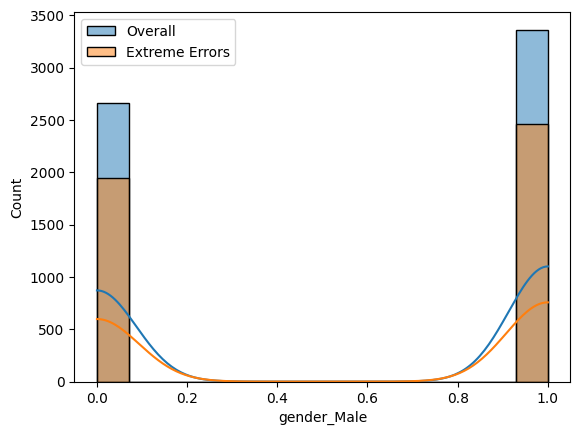

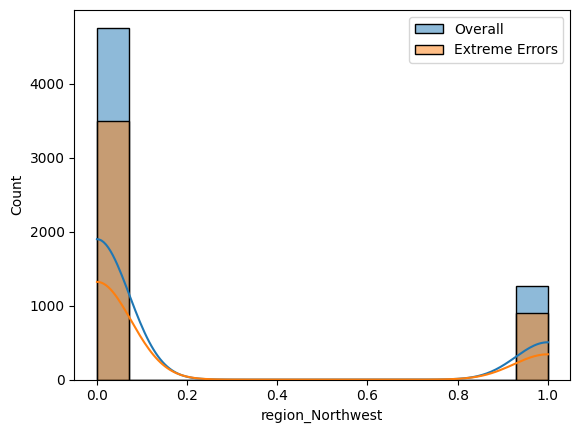

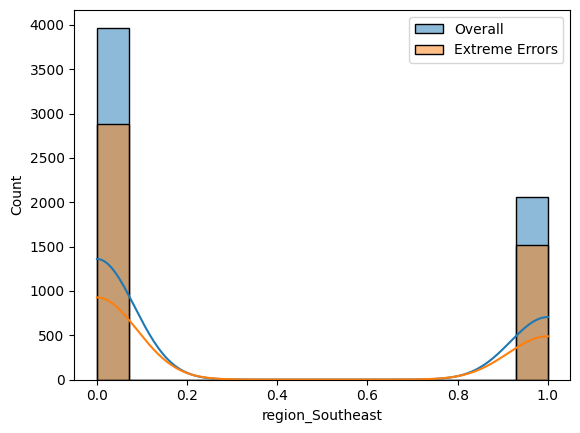

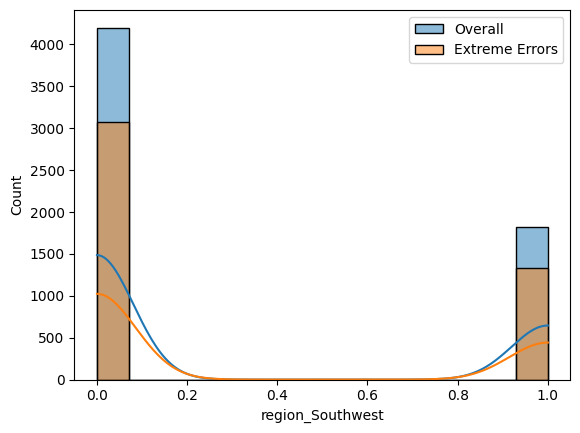

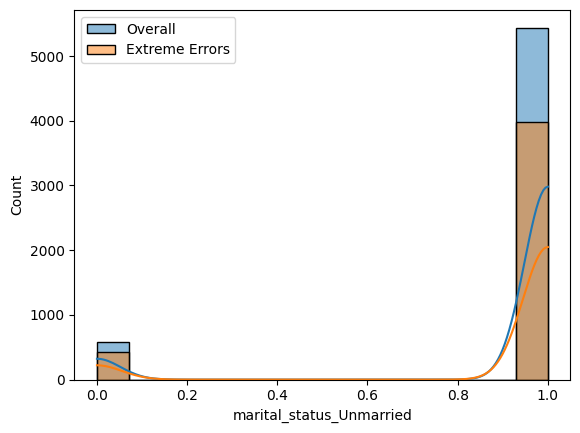

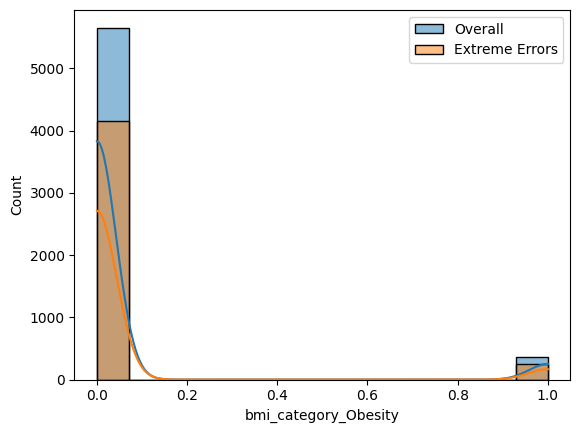

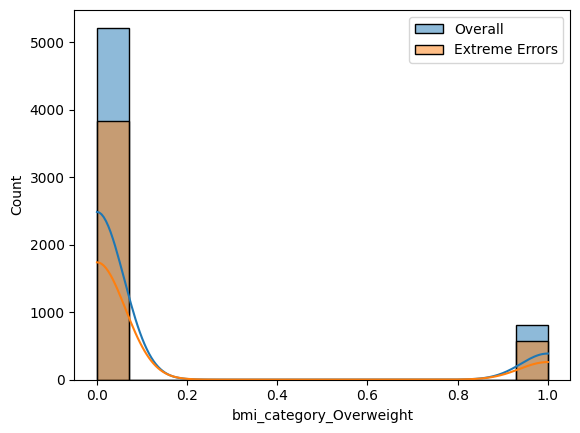

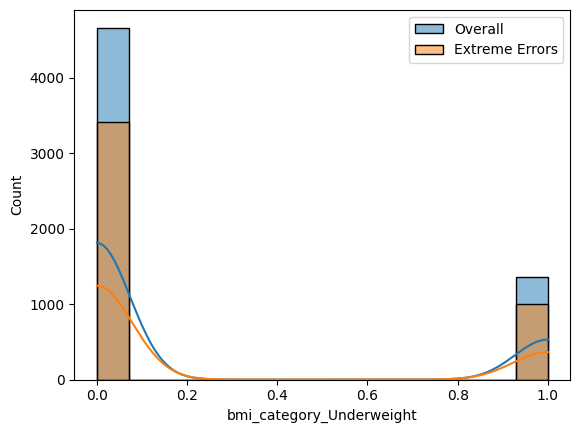

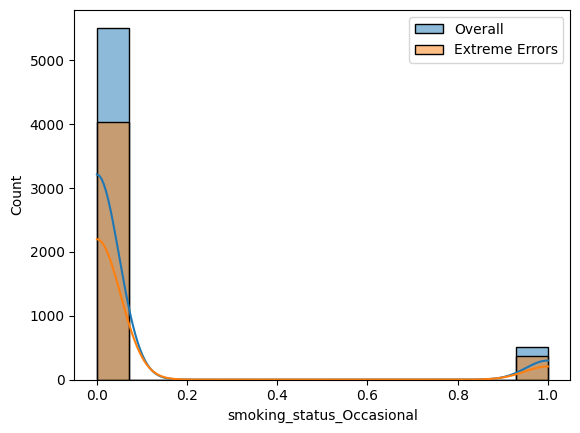

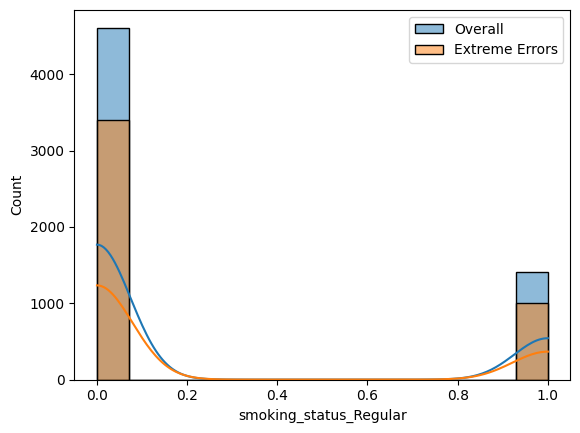

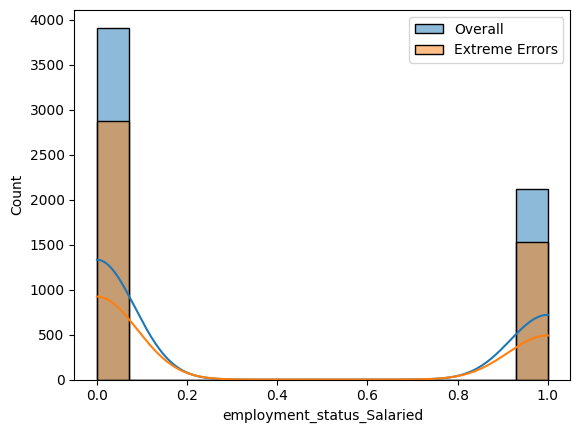

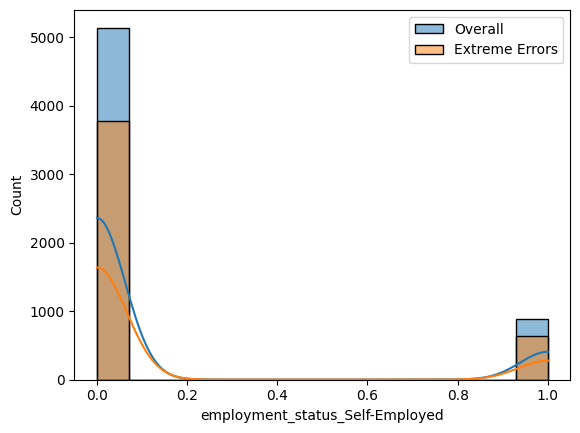

In [87]:
for feature in X.columns:
    sns.histplot(X_test[feature], label= "Overall", kde=True)
    sns.histplot(extreme_error_df[feature], label = "Extreme Errors",kde =True)
    plt.legend()
    plt.show()

In [75]:
extreme_error_df

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12774,1.000000,0.666667,0.000000,0.040404,0.0,0.0,1,0,0,1,1,0,0,1,0,0,0,0
14758,0.285714,0.000000,0.000000,0.060606,0.0,0.0,0,0,0,1,1,0,0,0,0,1,0,1
13205,0.714286,0.333333,0.333333,0.141414,0.0,0.0,1,1,0,0,1,0,0,0,0,1,0,1
14278,0.714286,0.333333,0.333333,0.222222,0.0,0.0,1,0,1,0,1,1,0,0,0,1,0,0
19351,0.571429,0.000000,0.333333,0.101010,0.0,0.0,1,0,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17652,0.571429,0.000000,0.666667,0.343434,0.0,0.0,1,0,0,0,1,0,0,0,0,0,1,0
5807,0.857143,0.333333,0.000000,0.040404,0.0,0.0,1,1,0,0,1,0,0,0,0,1,0,0
10298,0.000000,0.000000,0.333333,0.111111,0.5,0.0,1,0,1,0,1,0,1,0,0,1,1,0
13316,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1,0,0,0,1,0,0,1,0,0,0,0


In [76]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [77]:
extreme_error_df['income_level'] = -1

In [78]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,25.0,2.0,-2.0,5.0,1.0
1,20.0,0.0,-2.0,7.0,1.0
2,23.0,1.0,-2.0,15.0,1.0
3,23.0,1.0,-2.0,23.0,1.0
4,22.0,0.0,-2.0,11.0,1.0
...,...,...,...,...,...
5242,22.0,0.0,-2.0,35.0,1.0
5243,24.0,1.0,-2.0,5.0,1.0
5244,18.0,0.0,-2.0,12.0,2.0
5245,18.0,0.0,-2.0,1.0,1.0


In [79]:
df_reversed['age'].quantile(0.97)

np.float64(25.0)

### Model Segmentation